## Forecasting Mini-Course Sales

In this competition, participants are tasked with predicting one year’s worth of sales for various fictitious learning modules across different Kaggle-branded stores located in various real-world countries. The dataset provided is entirely synthetic, yet it incorporates many of the complexities and patterns typically observed in real-world sales data. This includes factors such as weekend effects, holiday impacts, and seasonal variations, which are crucial for accurate forecasting.


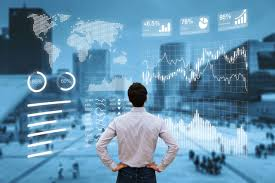

<a href='https://www.kaggle.com/competitions/playground-series-s3e19/' target=_blank>You can find the competition here</a>

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e19/sample_submission.csv
/kaggle/input/playground-series-s3e19/train.csv
/kaggle/input/playground-series-s3e19/test.csv


## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv('/kaggle/input/playground-series-s3e19/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s3e19/test.csv')
#Reading the files.

## EDA - Exploratory Data Analysis

In [4]:
train.head()

id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding        63  
1                   Using LLMs to Train More LLMs        66  
2  Using LLMs to Win Friends and Influence People         9  
3      Using LLMs to Win More Kaggle Competitions        59  
4                      Using LLMs to Write Better        49

In [5]:
test.head()

id        date    country         store  \
0  136950  2022-01-01  Argentina  Kaggle Learn   
1  136951  2022-01-01  Argentina  Kaggle Learn   
2  136952  2022-01-01  Argentina  Kaggle Learn   
3  136953  2022-01-01  Argentina  Kaggle Learn   
4  136954  2022-01-01  Argentina  Kaggle Learn   

                                          product  
0               Using LLMs to Improve Your Coding  
1                   Using LLMs to Train More LLMs  
2  Using LLMs to Win Friends and Influence People  
3      Using LLMs to Win More Kaggle Competitions  
4                      Using LLMs to Write Better

In [6]:
train.shape, test.shape

((136950, 6), (27375, 5))

In [7]:
train.isnull().sum()

id          0
date        0
country     0
store       0
product     0
num_sold    0
dtype: int64

In [8]:
test.isnull().sum()

id         0
date       0
country    0
store      0
product    0
dtype: int64

In [9]:
df=pd.concat([train,test])
#We merging the files.

In [11]:
df.head()

id        date    country         store  \
0   0  2017-01-01  Argentina  Kaggle Learn   
1   1  2017-01-01  Argentina  Kaggle Learn   
2   2  2017-01-01  Argentina  Kaggle Learn   
3   3  2017-01-01  Argentina  Kaggle Learn   
4   4  2017-01-01  Argentina  Kaggle Learn   

                                          product  num_sold  
0               Using LLMs to Improve Your Coding      63.0  
1                   Using LLMs to Train More LLMs      66.0  
2  Using LLMs to Win Friends and Influence People       9.0  
3      Using LLMs to Win More Kaggle Competitions      59.0  
4                      Using LLMs to Write Better      49.0

In [12]:
df.drop('id', axis=1, inplace=True)

In [25]:
df['date']=pd.to_datetime(df['date'])
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

## Data Visualization

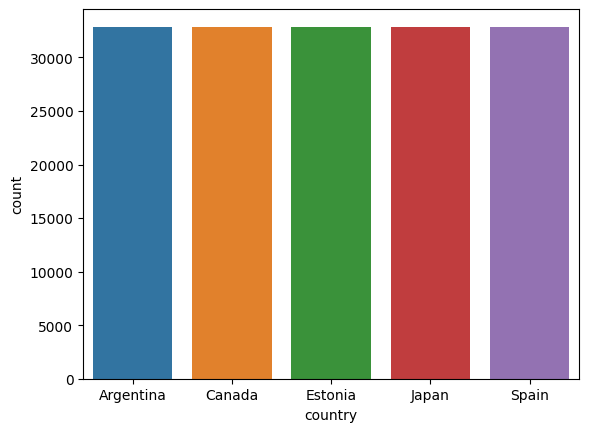

In [14]:
sns.countplot(x=df['country']);

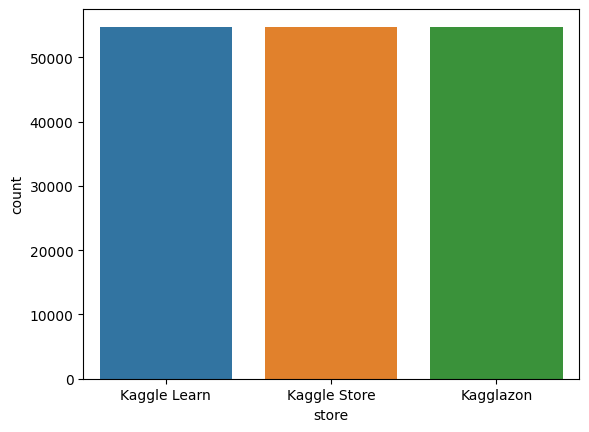

In [16]:
sns.countplot(x=df['store']);

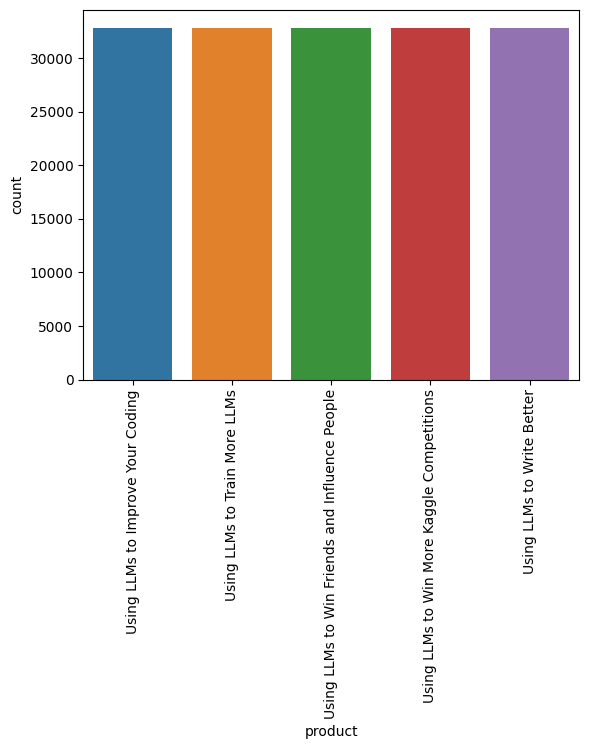

In [22]:
sns.countplot(x=df['product'])
plt.xticks(rotation=90);

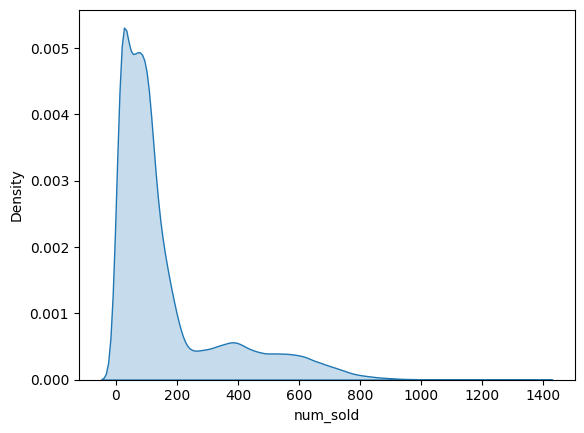

In [21]:
sns.kdeplot(x=df['num_sold'], fill=True);

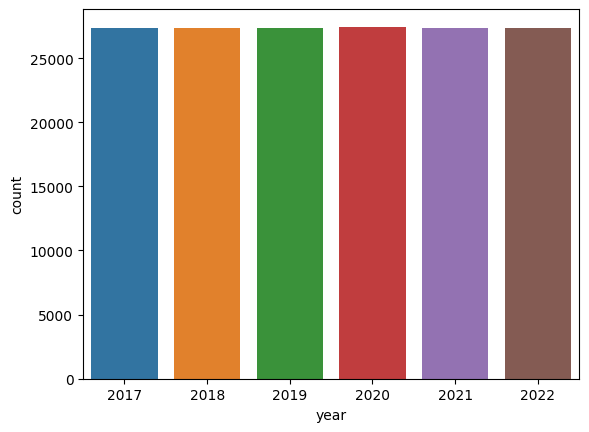

In [50]:
sns.countplot(x=df['year']);

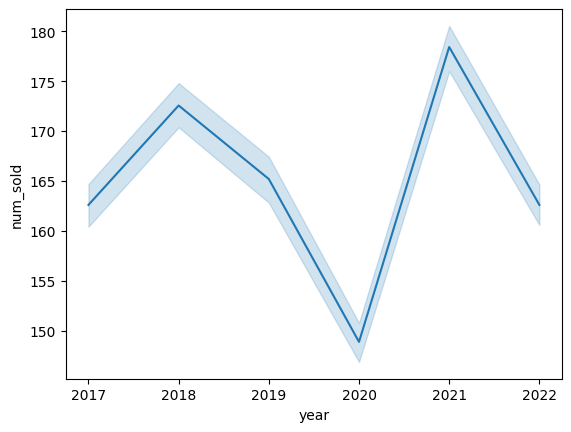

In [54]:
sns.lineplot(x=df['year'], y=df['num_sold']);

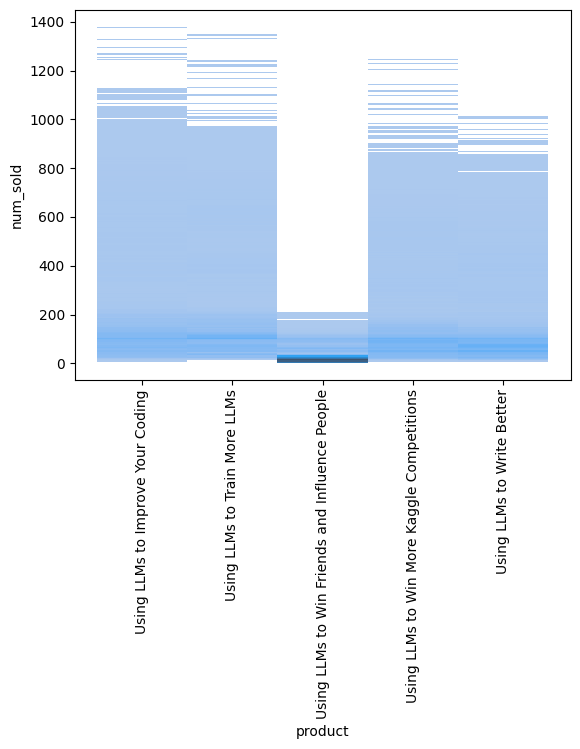

In [59]:
sns.histplot(x=df['product'], y=df['num_sold'])
plt.xticks(rotation=90);

In [35]:
train=df[:136950]
test=df[136950:]

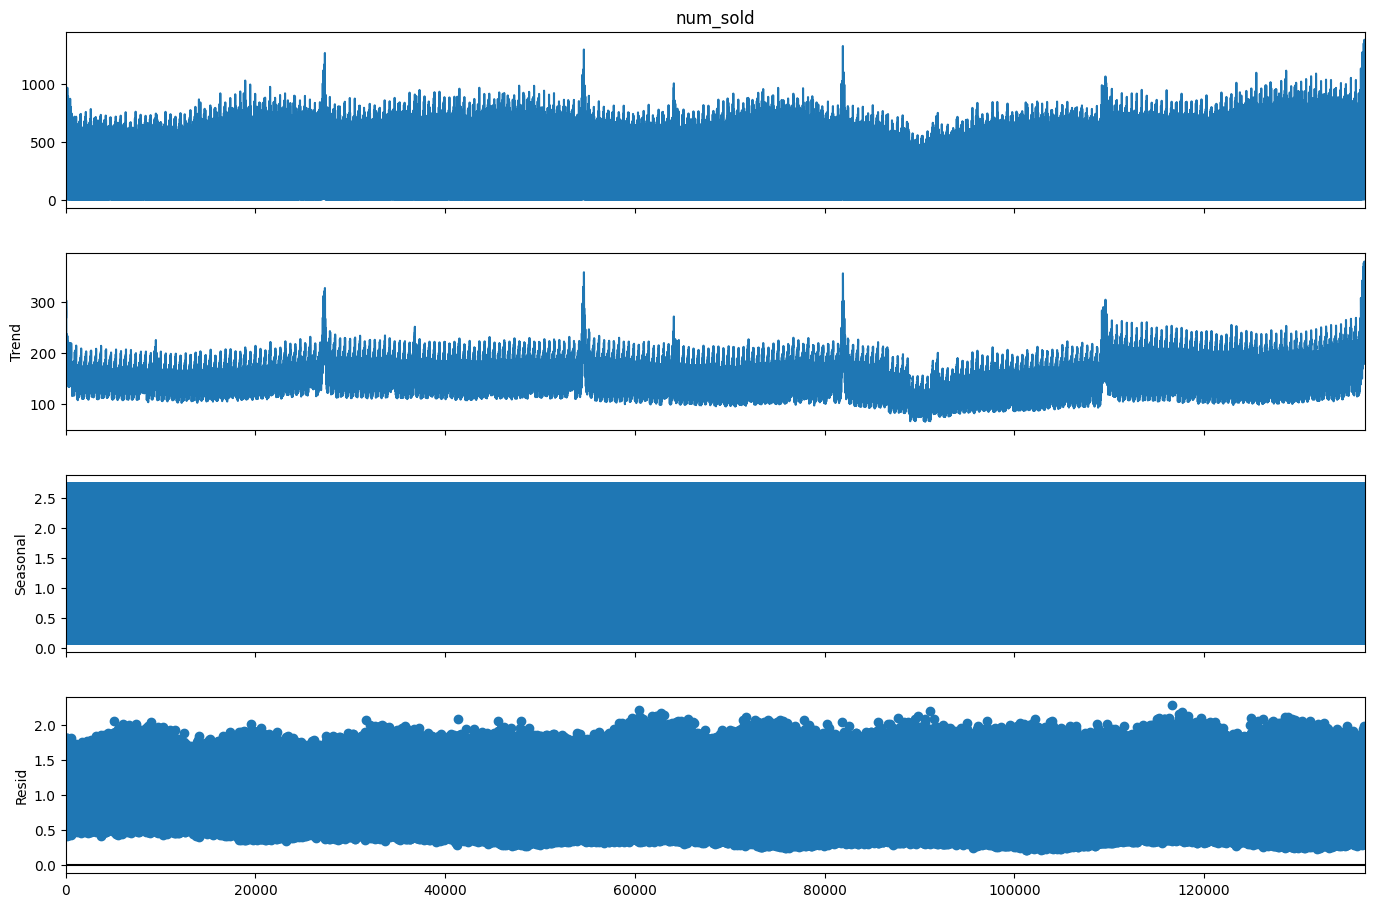

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(train['num_sold'],model='multiplicative',period=30)
fig=result.plot()
fig.set_size_inches(15,10)

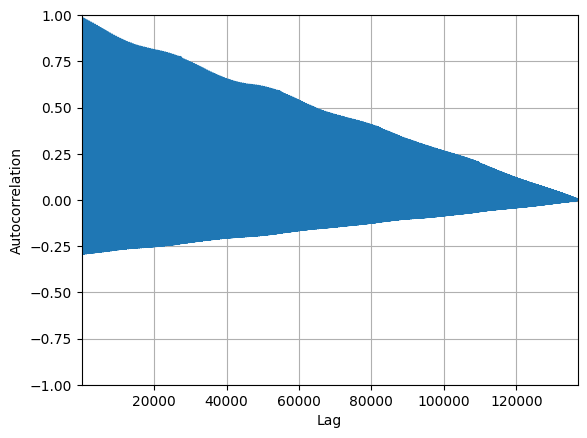

In [38]:
pd.plotting.autocorrelation_plot(train['num_sold']);

## Calculating P - D - Q Values

In [55]:
#pip install pmdarima

In [41]:
from pmdarima.arima import auto_arima 
model=auto_arima(train['num_sold'], seasonal=False, suppress_warnings=True)

print("Model Order (p, d, q):", model.order)

Model Order (p, d, q): (0, 1, 1)


In [42]:
time_series = train.set_index('date')['num_sold']  
result = adfuller(time_series)
print('ADF Statistics:', result[0])
print('p-value:', result[1])

ADF Statistics: -11.183076035748291
p-value: 2.4731599364612518e-20


## ARIMA

In [65]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

<Figure size 1200x600 with 0 Axes>

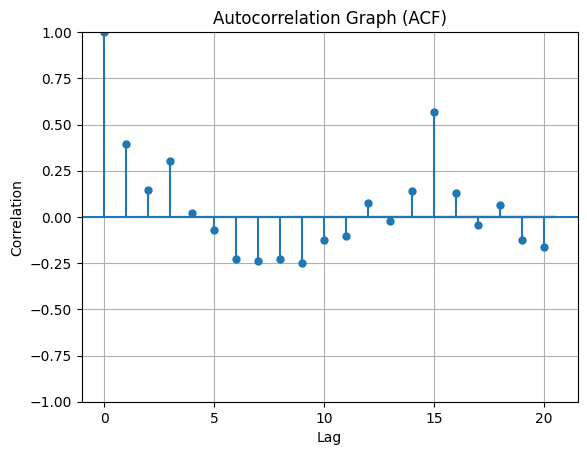

In [61]:
plt.figure(figsize=(12, 6))
plot_acf(time_series, lags=20)
plt.title('Autocorrelation Graph (ACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid()
plt.show();

<Figure size 1200x600 with 0 Axes>

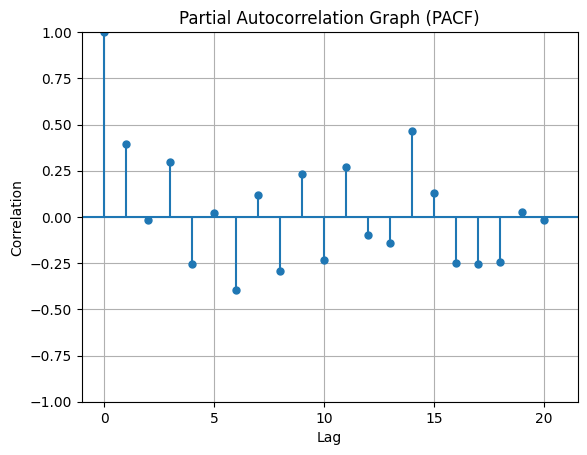

In [62]:
# PACF Grafiği
plt.figure(figsize=(12, 6))
plot_pacf(time_series, lags=20)
plt.title('Partial Autocorrelation Graph (PACF)')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid()
plt.show();

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



                               SARIMAX Results                                
Dep. Variable:               num_sold   No. Observations:               136950
Model:                 ARIMA(0, 1, 1)   Log Likelihood             -906595.955
Date:                Sat, 28 Sep 2024   AIC                        1813195.911
Time:                        21:17:27   BIC                        1813215.566
Sample:                             0   HQIC                       1813201.793
                             - 136950                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5765      0.002   -371.701      0.000      -0.580      -0.574
sigma2      3.293e+04     91.524    359.754      0.000    3.27e+04    3.31e+04
Ljung-Box (L1) (Q):                 948.74   Jarque-

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



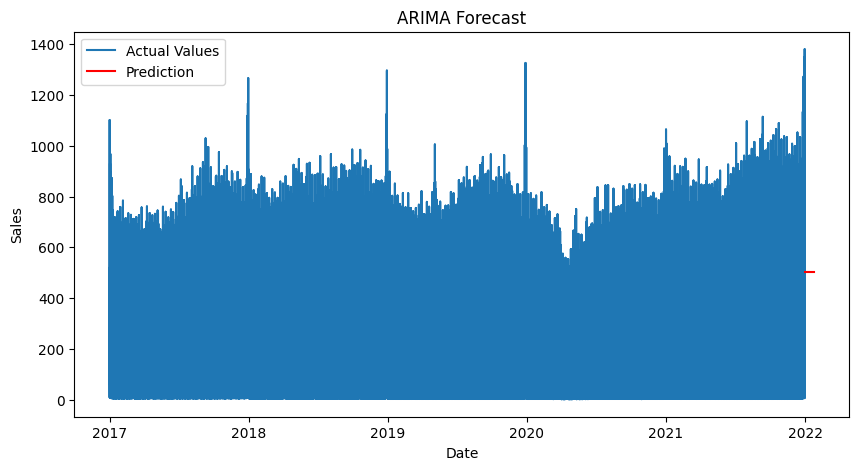

In [67]:
# ARIMA model parameters
p,d,q = 0 , 1 , 1
# We calculated the p,d,q values above.  

# Building an ARIMA model
model = ARIMA(time_series, order=(p, d, q))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

# Forecasting (Guess 25 steps ahead)
forecast_steps = 25
forecast = model_fit.forecast(steps=forecast_steps)

# Visualizing forecast results
plt.figure(figsize=(10, 5))
plt.plot(time_series, label='Actual Values')

# Creating forecast dates with due date
forecast_dates = pd.date_range(start=time_series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)

# Drawing predictions
plt.plot(forecast_dates, forecast, label='Prediction', color='red')
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Prophet

In [63]:
#pip install prophet

In [51]:
forecast_data=df.rename(columns={'date':'ds','num_sold':'y'})

In [52]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model=Prophet()
model.fit(forecast_data)
forecasts=model.make_future_dataframe(periods=365)
predictions=model.predict(forecasts)
plot_plotly(model,predictions)

20:59:44 - cmdstanpy - INFO - Chain [1] start processing
21:00:19 - cmdstanpy - INFO - Chain [1] done processing


## Summary

Our approach began with an analysis of the mini course sales data, which was found to be stationary, allowing us to directly apply the ARIMA model. We evaluated the model's parameters and fitted the data accordingly. The ARIMA model provided a solid foundation for understanding sales trends.

Subsequently, we incorporated the Prophet library, which is designed for forecasting time series data that may exhibit seasonal effects or holiday effects. Although our initial data was non-seasonal, Prophet’s flexibility and user-friendly nature allowed us to explore various forecasting scenarios effectively.

In conclusion, our project successfully demonstrated the application of ARIMA and Prophet for forecasting mini course sales, providing valuable insights for future sales strategies and decision-making processes. This dual approach allowed us to leverage the strengths of both models, enhancing our overall forecasting accuracy.